In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.shape

(768, 9)

In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
df.duplicated().sum()

0

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
df.Glucose.value_counts()

,count
Glucose,
99,17
100,17
111,14
129,14
125,14
...,...
191,1
177,1
44,1


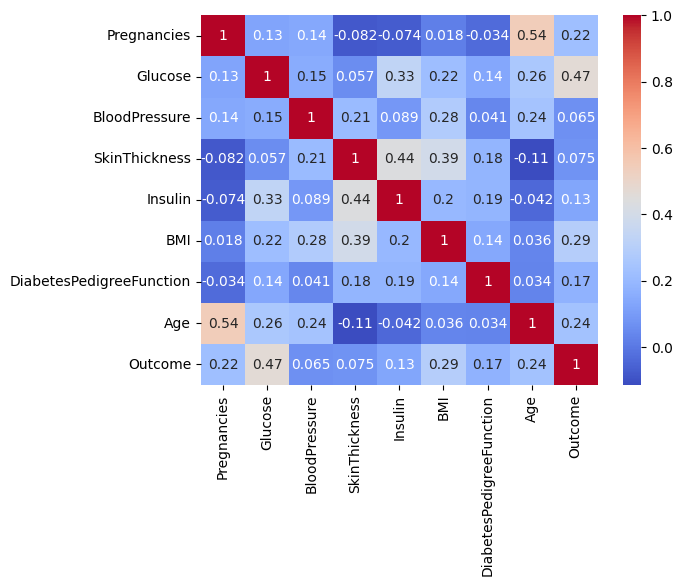

In [12]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

Features with High Correlation to Outcome:

Glucose: Correlation = 0.47 (highest correlation).

BMI: Correlation = 0.29.

Age: Correlation = 0.24.

Pregnancies: Correlation = 0.22.

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Outcome"])  # Features
y = df["Outcome"]  # Target

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale features
X_scaled = scaler.fit_transform(X)

# Check scaled data
print(X_scaled[:5])


[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


In [15]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Scale features
X_scaled = scaler.fit_transform(X)

# Check scaled data
print(X_scaled[:5])

[[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [21]:
print("x_train shape:", X_train.shape)
print("x_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (537, 8)
x_test shape: (231, 8)
y_train shape: (537,)
y_test shape: (231,)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc

In [23]:
# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print("Accuracy Score:",accuracy_score(y_test, y_pred_log))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       151
           1       0.66      0.56      0.61        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.75      0.74       231

Accuracy Score: 0.7489177489177489


In [24]:
# Train Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt.predict(X_test)
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy Score:",accuracy_score(y_test, y_pred_dt))

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       151
           1       0.55      0.64      0.59        80

    accuracy                           0.70       231
   macro avg       0.67      0.68      0.68       231
weighted avg       0.71      0.70      0.70       231

Accuracy Score: 0.696969696969697


In [25]:
# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy Score:",accuracy_score(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       151
           1       0.61      0.61      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231

Accuracy Score: 0.7316017316017316


In [26]:
# Train Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm.predict(X_test)
print("Support Vector Machine Performance:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy Score:",accuracy_score(y_test, y_pred_svm))

Support Vector Machine Performance:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.60      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231

Accuracy Score: 0.7532467532467533


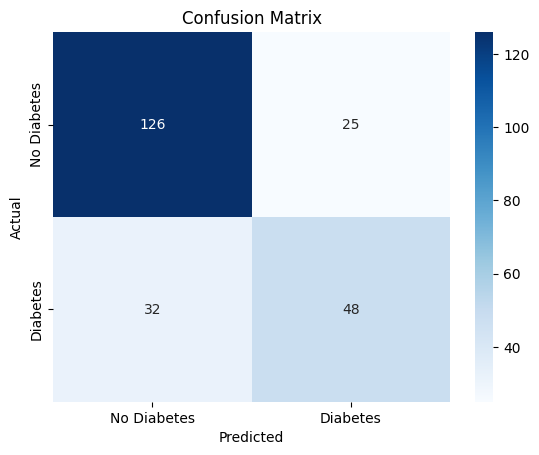


True Negatives (TN): 126
False Positives (FP): 25
False Negatives (FN): 32
True Positives (TP): 48


In [35]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print confusion matrix components
TN, FP, FN, TP = cm.ravel()
print(f"\nTrue Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")


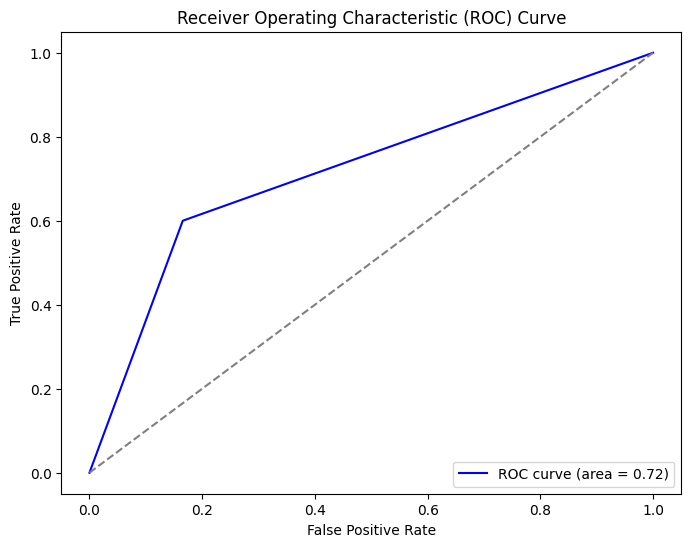


ROC AUC: 0.7172185430463577


In [34]:
# Get probabilities for ROC curve
y_prob = svm.predict(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)
print(f"\nROC AUC: {roc_auc}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Confusion Matrix for Best Model:
 [[121  30]
 [ 25  55]]


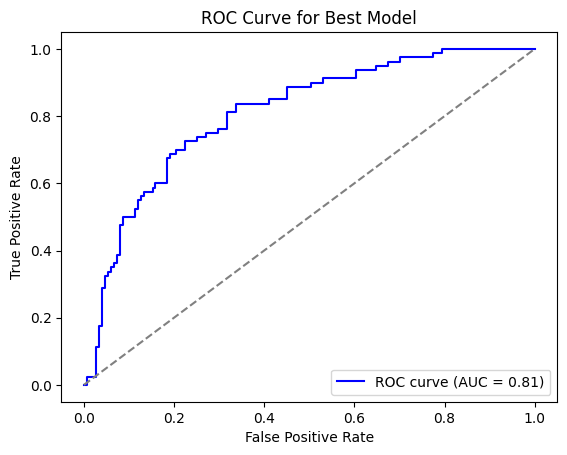

In [37]:
from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

# Reevaluate the model with the best parameters
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate using confusion matrix and ROC curve
cm_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix for Best Model:\n", cm_best)

# Plot ROC curve for the best model
y_prob_best = best_model.predict_proba(X_test)[:, 1]
fpr_best, tpr_best, _ = roc_curve(y_test, y_prob_best)
roc_auc_best = auc(fpr_best, tpr_best)

plt.plot(fpr_best, tpr_best, color='blue', label=f'ROC curve (AUC = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Model')
plt.legend(loc='lower right')
plt.show()


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters from Random Search:  {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 177}
Confusion Matrix for Best Model from Random Search:
 [[120  31]
 [ 28  52]]


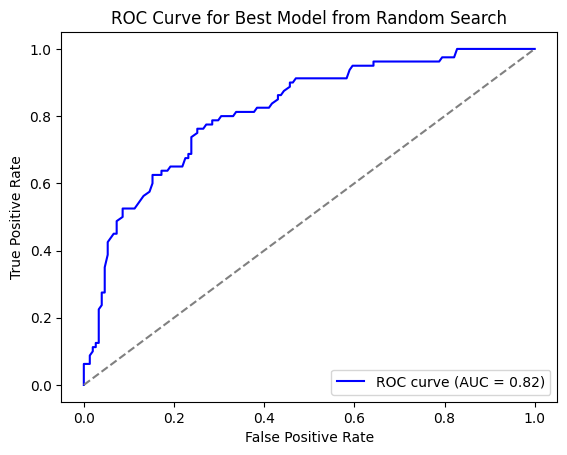

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform Random Search with cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best Hyperparameters from Random Search: ", random_search.best_params_)

# Reevaluate the model with the best parameters
best_model_random = random_search.best_estimator_
y_pred_best_random = best_model_random.predict(X_test)

# Evaluate using confusion matrix and ROC curve
cm_best_random = confusion_matrix(y_test, y_pred_best_random)
print("Confusion Matrix for Best Model from Random Search:\n", cm_best_random)

# Plot ROC curve for the best model
y_prob_best_random = best_model_random.predict_proba(X_test)[:, 1]
fpr_best_random, tpr_best_random, _ = roc_curve(y_test, y_prob_best_random)
roc_auc_best_random = auc(fpr_best_random, tpr_best_random)

plt.plot(fpr_best_random, tpr_best_random, color='blue', label=f'ROC curve (AUC = {roc_auc_best_random:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Model from Random Search')
plt.legend(loc='lower right')
plt.show()
